
# Telco Customer Churn Prediction Using Machine Learning 


# 1. Business Understanding


Problem Statement

Customer attrition (churn) is a significant concern for businesses as it directly impacts revenue and growth. Understanding the factors influencing churn and predicting it accurately can help organizations implement proactive retention strategies.

Goals and Objectives

    Goal: Develop a machine learning model to predict customer churn.

    Objectives:
Identify key indicators of churn.
Build a model with high accuracy, precision, and recall.
Provide actionable insights to reduce churn rate.

Hypothesis (Null and Alternative)

    Null Hypothesis (H0): 
There is no significant relationship between customer attributes (demographics, usage patterns, etc.) and churn.
    Alternative Hypothesis (H1): 
Specific customer attributes significantly influence churn rates.

Analytical Questions
1. How do different customer attributes (e.g. demographs) influence churn?
2. Which services (e.g., internet type, contract terms) are associated with higher churn rates?
3. Can payment methods affect customer retention?
4. Is there a correlation between tenure and churn rate?
5. How effective are promotional offers in reducing churn?

    

In [1]:
# Connection packages
import os
import pyodbc  
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package

# Data handling
import pandas as pd
import numpy as np
import warnings 

# EDA 
#import ydata_profiling as pp

# Hypothesis testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature processing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE  # For balancing the dataset

# Import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load environment variables from .env file into a dictionary

environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file

server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [4]:
# Create a connection string

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [ ]:
# Use the connect method of the pyodbc library and pass in the connection string

connection = pyodbc.connect(connection_string)

connection.timeout = 60 

In [ ]:
# Fetching sql query

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [ ]:
data.head()

In [ ]:
# Save dataFrame to CSV

first_3000 = 'LP2_Telco_churn_first_3000.csv'
data.to_csv(first_3000, index=False)

In [ ]:
# Read the CSV file into a DataFrame

first_3000_data = pd.read_csv(first_3000)

In [ ]:
# Display the first few rows of the DataFrame directly

first_3000_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [ ]:
first_3000_data.shape

(3000, 21)

In [ ]:

second_2000_data = pd.read_csv('LP2_Telco-churn-second-2000.csv')
second_2000_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [ ]:
second_2000_data.shape

(2043, 21)

In [ ]:
# Concatenate the two datasets

# Concatenate based on customerID column
combined_data = pd.concat([first_3000_data.set_index('customerID'), second_2000_data.set_index('customerID')])

# Reset index to make customerID a regular column again
combined_data.reset_index(inplace=True)

combined_data.shape


In [ ]:
# Save the concatenated datasets into a csv format 

combined_data.to_csv('combined_data.csv', index=False)


In [ ]:
combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True



# 2. Data Understanding

Exploratory Data Analysis

    1. Understanding The Data

In [2]:
combined_data = pd.read_csv('combined_data.csv')

In [6]:
combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [7]:
combined_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Standardizing the True and False values

# Standardize function

def standardize_values(df, column, true_values, false_values):
    df[column] = df[column].replace(true_values, 'Yes')
    df[column] = df[column].replace(false_values, 'No')

# List of columns to standardize
columns_to_standardize = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Values that represent True/Yes and False/No
true_values = ['True', 'Yes', 'yes', 'true']
false_values = ['False', 'No', 'no', 'false']

# Apply standardization
for column in columns_to_standardize:
    standardize_values(combined_data, column, true_values, false_values)

# Verify changes
for column in columns_to_standardize:
    print(f"{column}: {combined_data[column].unique()}")


Churn: ['No' 'Yes' nan]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: [nan 'No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' nan 'No internet service']
OnlineBackup: ['Yes' 'No' nan 'No internet service']
DeviceProtection: ['No' 'Yes' nan 'No internet service']
TechSupport: ['No' 'Yes' nan 'No internet service']
StreamingTV: ['No' 'Yes' nan 'No internet service']
StreamingMovies: ['No' 'Yes' nan 'No internet service']
PaperlessBilling: ['Yes' 'No']


In [9]:

# Count NaN values in each column
nan_counts = combined_data.isna().sum()

# Filter and print columns with NaN values
nan_columns = nan_counts[nan_counts > 0]
print("\nColumns with NaN values and their counts:")
print(nan_columns)



Columns with NaN values and their counts:
MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
TotalCharges          5
Churn                 1
dtype: int64


In [11]:
columns = combined_data.columns

In [12]:
# Unique values in each column
for column in columns:
    print(f'{column}')
    print(f'There are {combined_data[column].unique().size} unique values')
    print(f'These are {combined_data[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 2 unique values
These are ['Yes' 'No']
Dependents
There are 2 unique values
These are ['No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
These are ['No' 'Yes']
MultipleLines
There are 4 unique values
These are [nan 'No' 'Yes' 'No phone service']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 4 unique values
These are ['No' 'Yes' nan 'No internet service']
OnlineBackup
There are 4 unique values
These a

In [ ]:
'''
# Convert 'Churn' to binary numeric values
combined_data['Churn'] = combined_data['Churn'].map({'Yes': 1, 'No': 0})

# Verify conversion
print(combined_data['Churn'].unique())  # Check unique values after conversion
'''

In [13]:
combined_data.shape

(5043, 21)

In [14]:
#Overview after standardization

combined_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789,Yes
3,7795-CFOCW,Male,0,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.64999389648438,Yes


In [15]:
# Overview after standardization

combined_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [16]:
combined_data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5043,5043,5043.000000,5043,5043,5043.000000,5043,4774,5043,4392,...,4392,4392,4392,4392,5043,5043,5043,5043.000000,5038,5042
unique,5043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,4870,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,NaN,20.450000762939453,No
freq,1,2559,NaN,2585,3482,NaN,4554,2424,2248,2507,...,2219,2472,2018,1982,2744,2996,1700,NaN,5,3706
mean,NaN,NaN,0.162403,NaN,NaN,32.576641,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090214,NaN,NaN
std,NaN,NaN,0.368857,NaN,NaN,24.529807,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.068133,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.775000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050003,NaN,NaN


In [17]:
combined_data.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4870
Churn                  2
dtype: int64

In [18]:
combined_data[combined_data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
combined_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
'''
# Use pandas_profiling.ProfileReport method

pp.ProfileReport(combined_data)
'''

    2.Data Quality Assessment 
        a. Checking Missing Values


In [21]:
combined_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

        b.Detecting Outliers

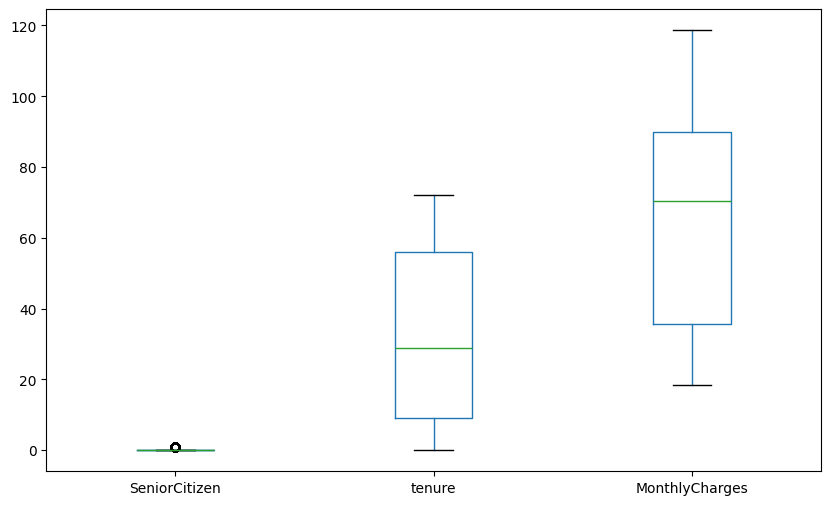

In [22]:
# Detection through boxplots

combined_data.boxplot(figsize=(10, 6), grid=False)
plt.show()


    3.Univariate Analysis 

        a. Summary Statistics

In [23]:

summary_stats = combined_data.describe( include = 'all')
summary_stats

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5043,5043,5043.000000,5043,5043,5043.000000,5043,4774,5043,4392,...,4392,4392,4392,4392,5043,5043,5043,5043.000000,5038,5042
unique,5043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,4870,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,NaN,20.450000762939453,No
freq,1,2559,NaN,2585,3482,NaN,4554,2424,2248,2507,...,2219,2472,2018,1982,2744,2996,1700,NaN,5,3706
mean,NaN,NaN,0.162403,NaN,NaN,32.576641,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090214,NaN,NaN
std,NaN,NaN,0.368857,NaN,NaN,24.529807,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.068133,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.775000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050003,NaN,NaN


        b. Distribution Visualization

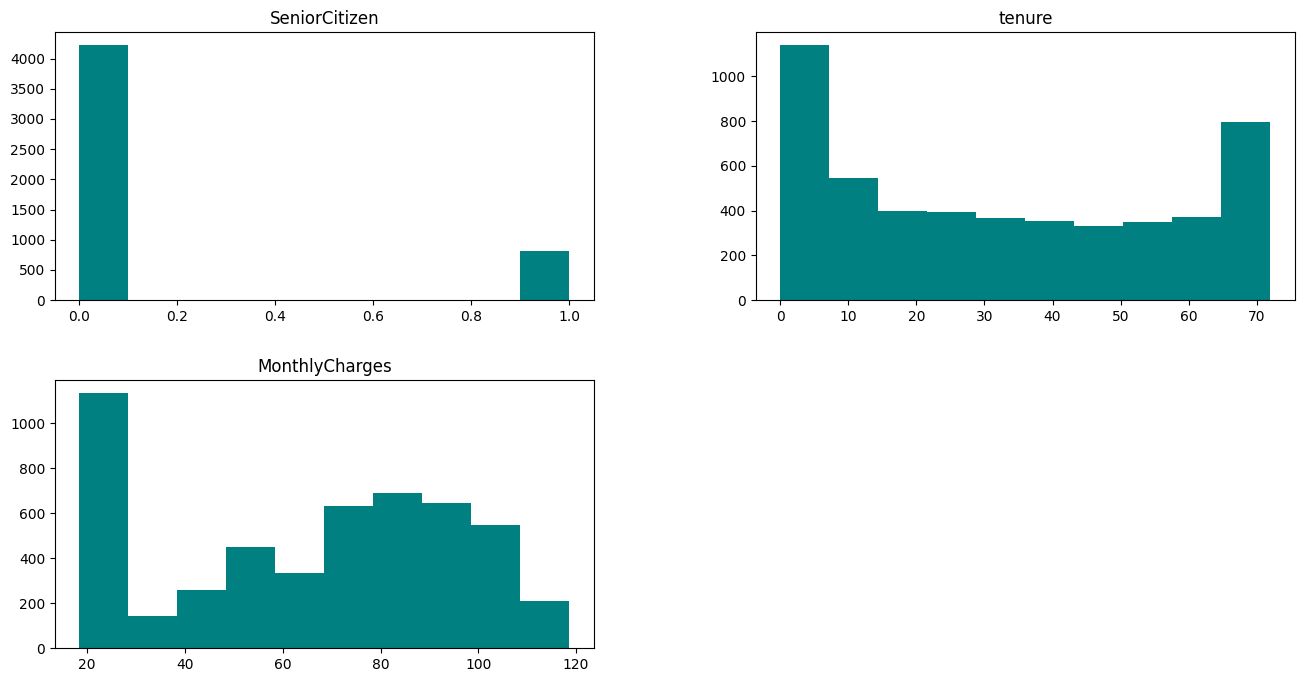

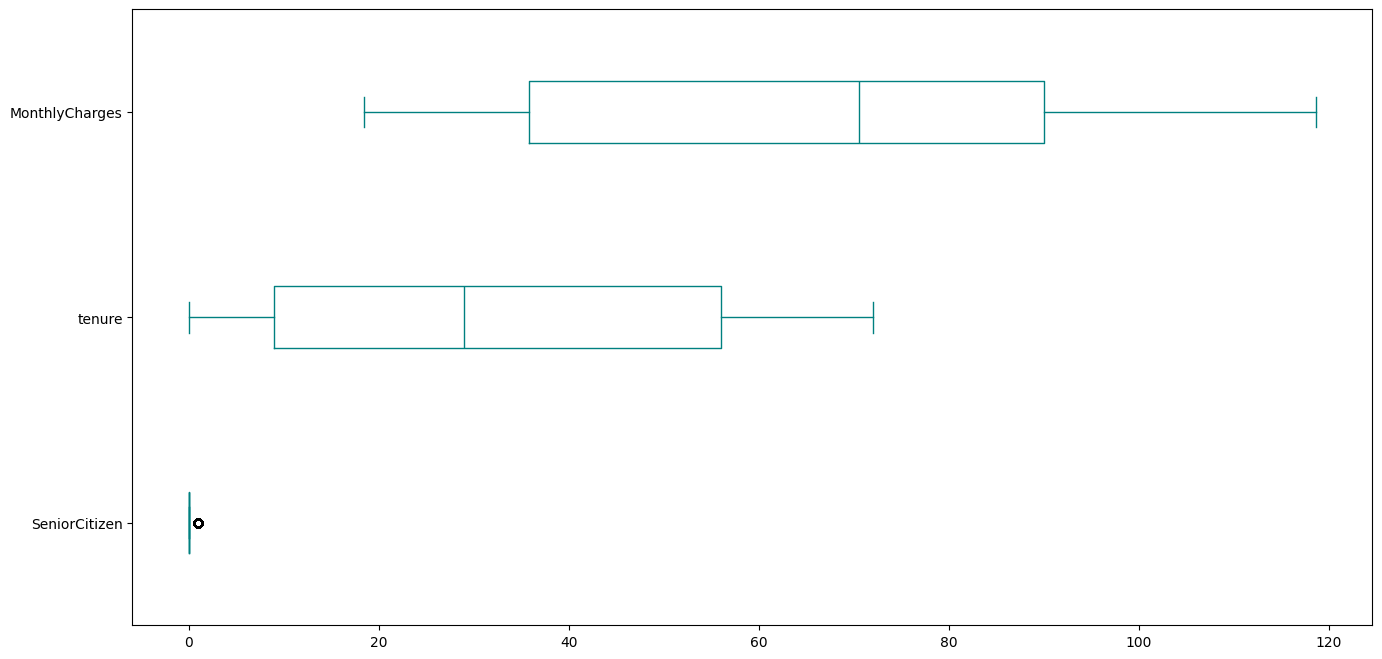

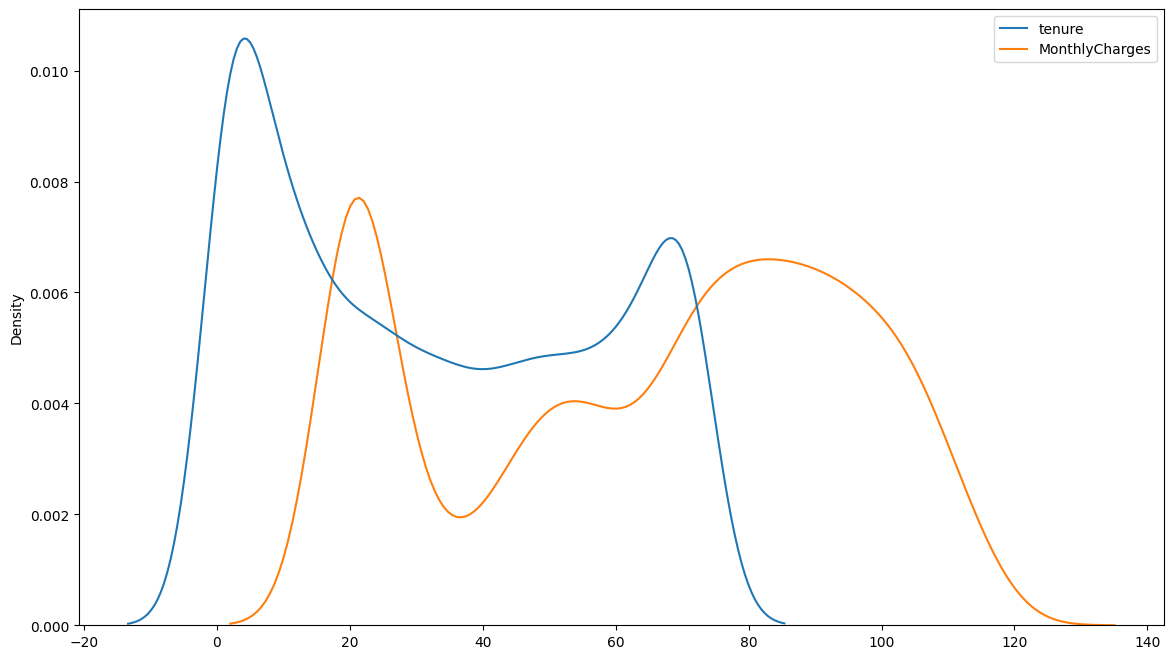

In [26]:
# Histogram

combined_data.hist(figsize = (16,8),grid = False, color = 'teal')
plt.show()


# Boxplot
combined_data.boxplot(figsize=(16, 8), vert=False, grid=False, color='teal')
plt.show()

plt.figure(figsize=(14,8))
sns.kdeplot(combined_data.drop(['SeniorCitizen'], axis=1), color='teal')
plt.grid(False)
plt.show()

    Univariate Interpretation
Histogram 
Shows a peak around higher values and a long tail towards lower values, it indicates left-skewness.
Box plot 
Confirms the presence of low-value anomalies esp in the senior citizen feature
KDE plot 
Peaks indicate common values provides a smoothed view of these observations.
The distribution has lighter tails and a flatter peak than a normal distribution.


    4.Bivariate Analysis 

In [43]:
'''
# encoding the churn category for visualization

# Check unique values in 'Churn'
print(combined_data['Churn'].unique())  # Check unique values to confirm

# Convert 'Churn' to binary numeric values
combined_data['Churn'] = combined_data['Churn'].map({'Yes': 1, 'No': 0})

# Verify conversion
print(combined_data['Churn'].unique())  # Check unique values after conversion

'''

[ 0.  1. nan]
[nan]


Customer Service Analysis 

In [27]:
#Make a function to plot categorical data according to target

import math


def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = combined_data, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

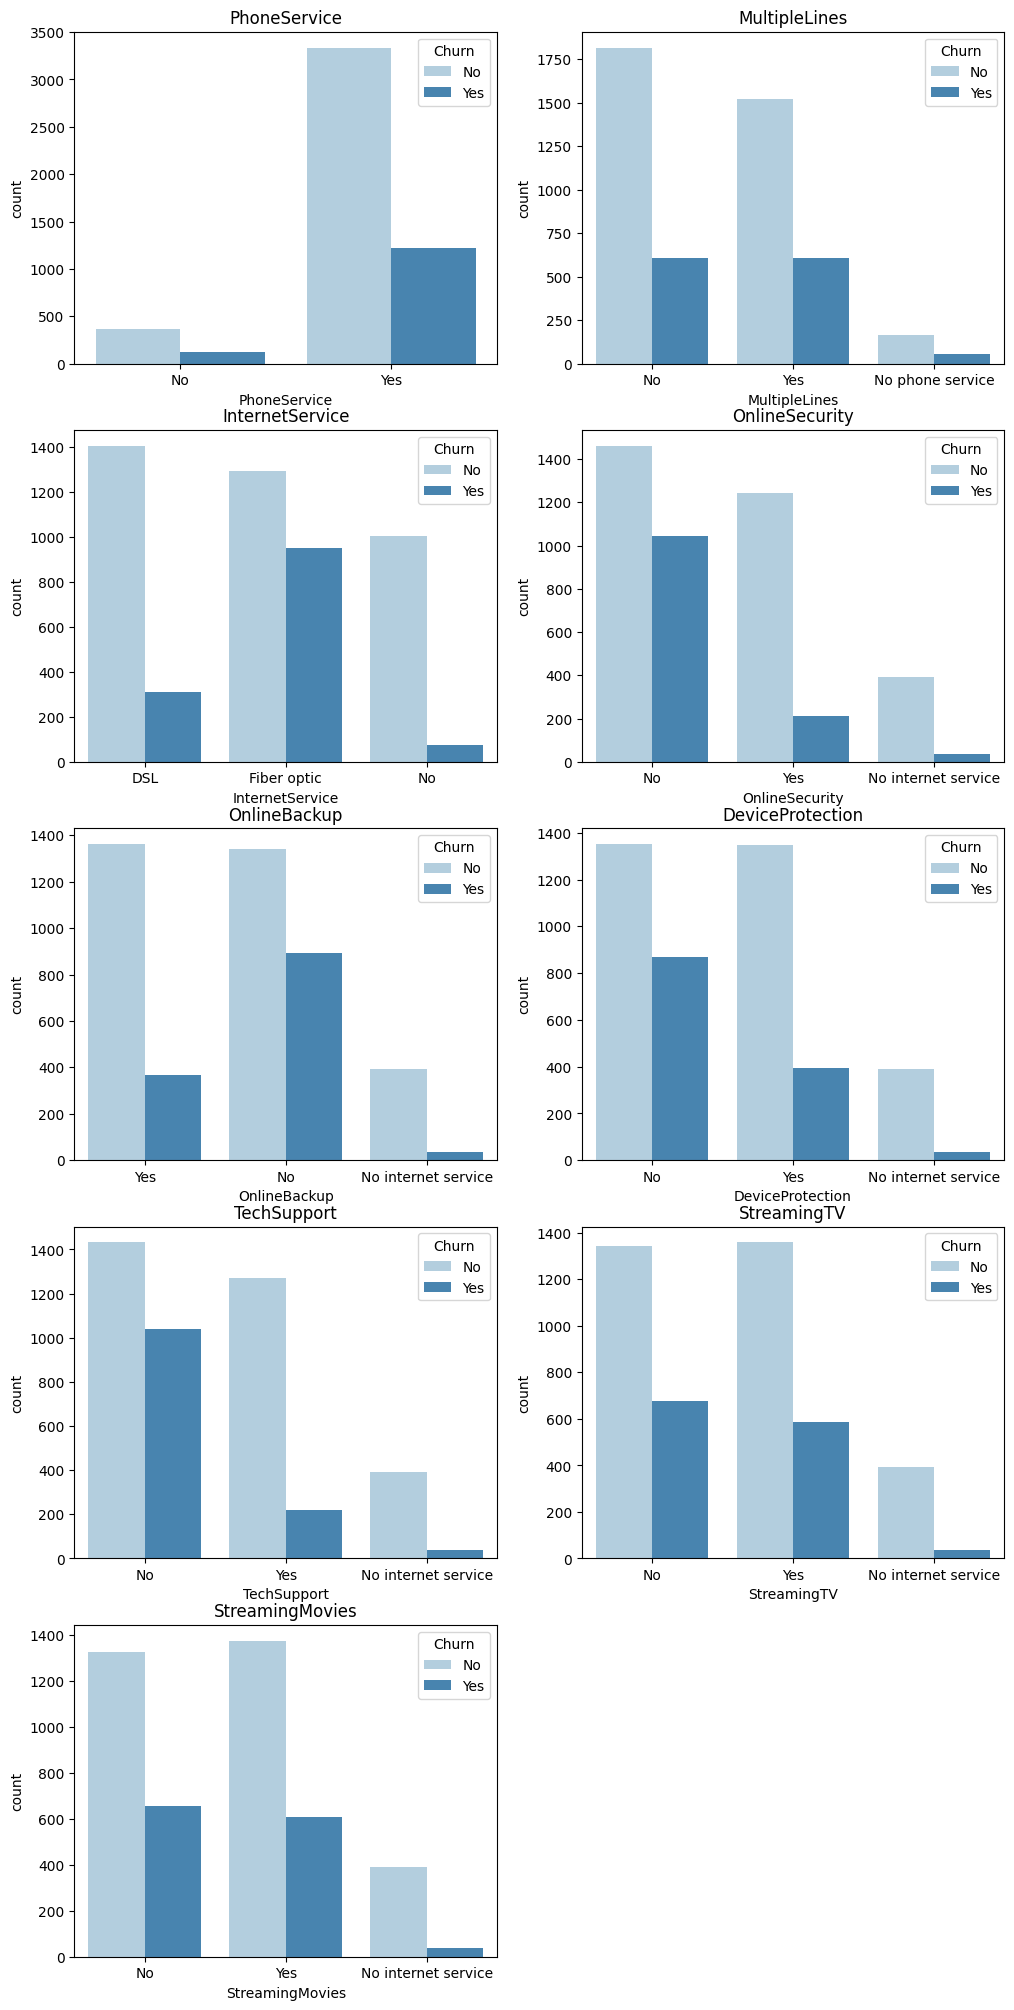

In [28]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(combined_data,customer_services, "Churn")


Customer Account Analysis - Categorical Variables

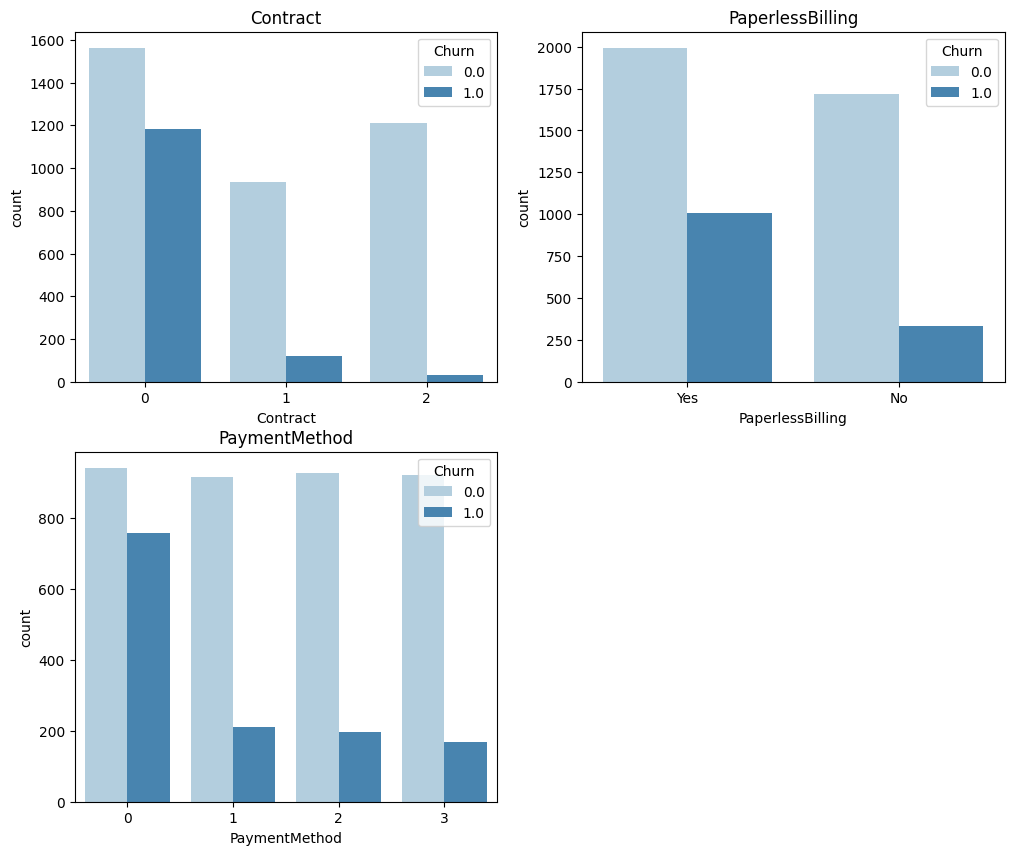

In [62]:
# Delete "automatic" from PaymentMethod

#combined_data["PaymentMethod"] = combined_data["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(combined_data,customer_account_cat,"Churn")

Customer Demographic Analysis - Categorical Variables

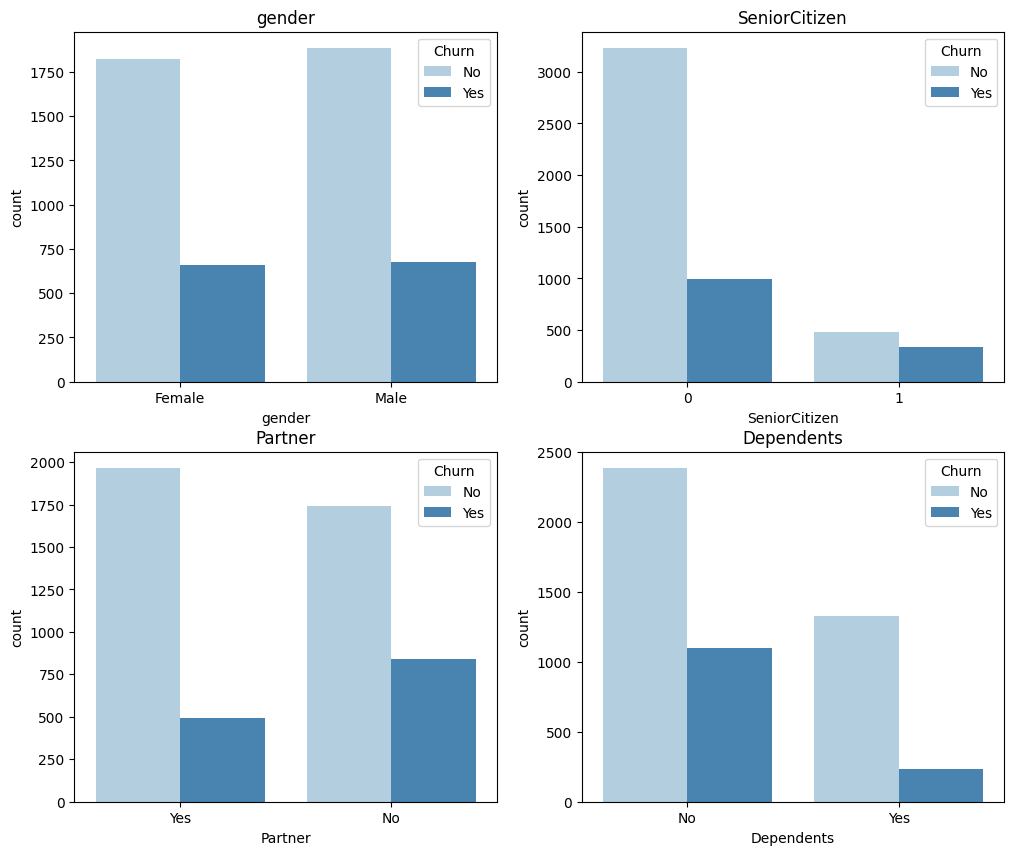

In [30]:
customer_demo_cat = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(combined_data,customer_demo_cat,"Churn")

Customer Account Analysis - Numerical Variables

In [31]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    #plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

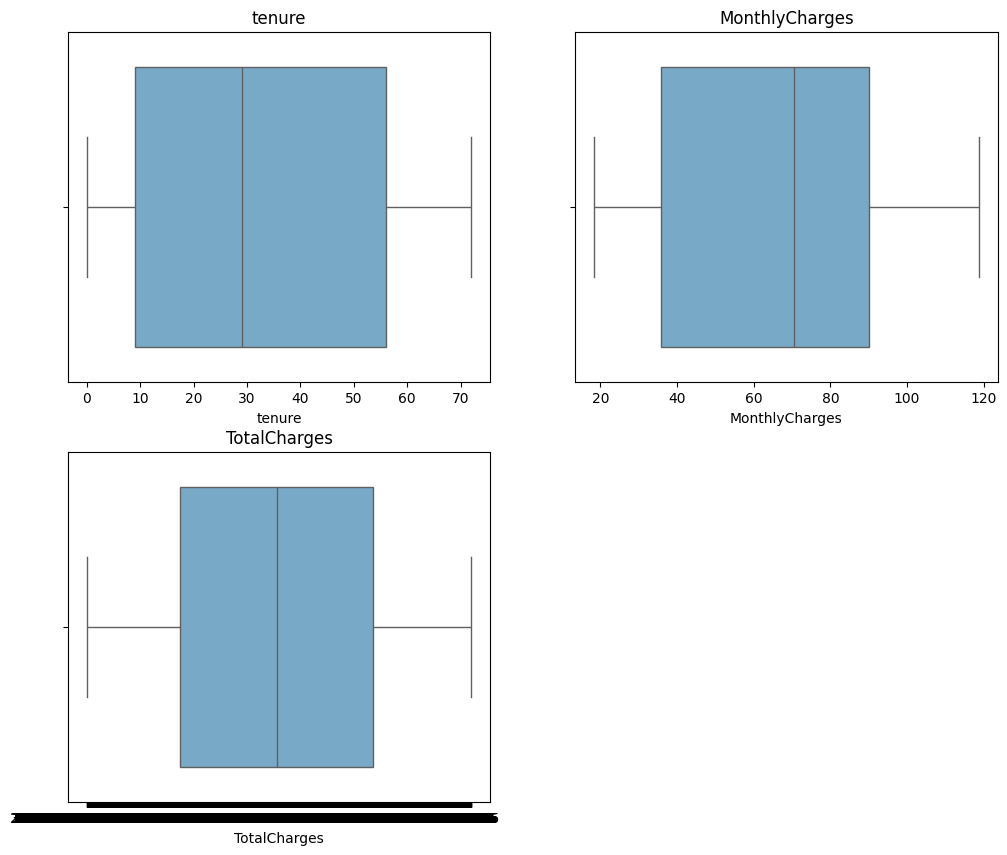

In [43]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(combined_data,numerical_values)

    5.Multivariate Analysis 


        a. Total Charges, Tenure and Churn

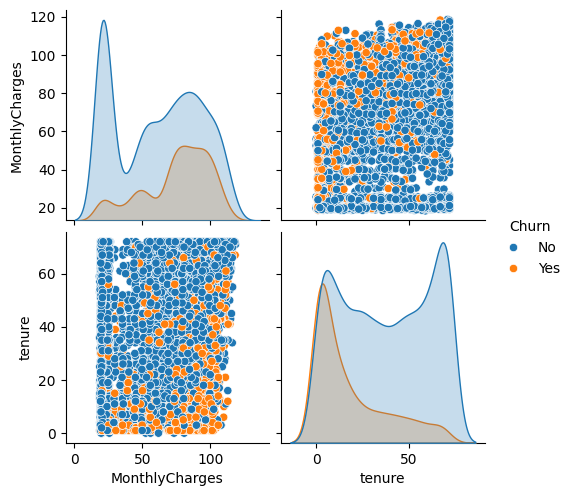

In [40]:
# Pair plot for TotalCharges, MonthlyCharges, Tenure, and Churn
'''
sns.pairplot(combined_data, hue='Churn', vars=['TotalCharges', 'MonthlyCharges', 'tenure'], palette={'Yes': 'red', 'No': 'blue'})
plt.suptitle('Pair Plot for TotalCharges, MonthlyCharges, Tenure  and Churn', y=1.02)
plt.show()
'''

sns.pairplot(combined_data[['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()

'''
sns.pairplot(combined_data[numerical_columns + ['Churn']], hue='Churn')
plt.show()
'''

Interpretation:

The plots show pairwise relationships between TotalCharges, MonthlyCharges, and Tenure, colored by churn status.
There is a visible clustering of churned customers in certain areas, particularly those with high charges and low tenure.
High MonthlyCharges and low Tenure are indicative of cost-sensitive customers who are likely to churn.

Correlation Matrix Of All Features

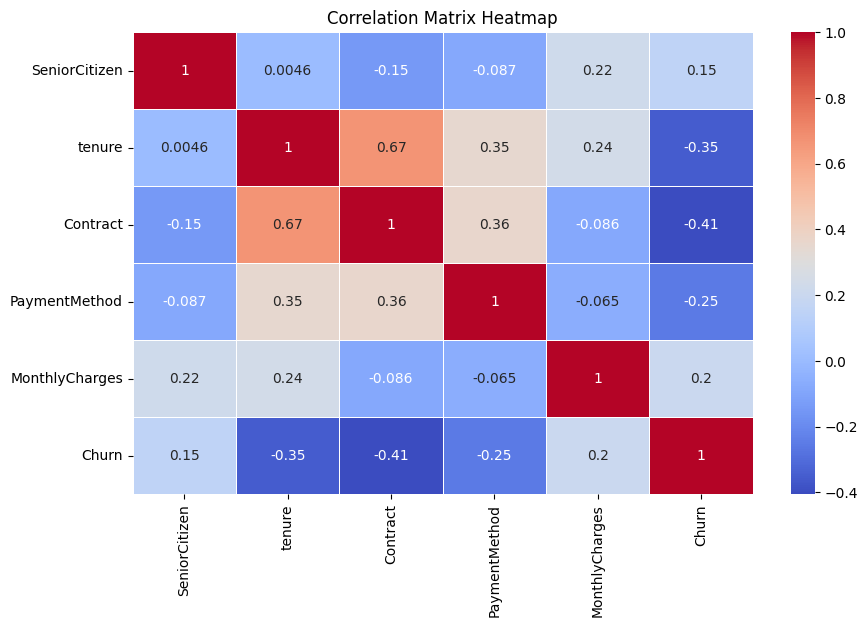

In [43]:
# Select only numeric columns for correlation matrix
numeric_df = combined_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



Answering Analytical Questions


1. How do different customer demgraphics (e.g. gender, SeniorCitizen, Partner, Dependents) influence churn?


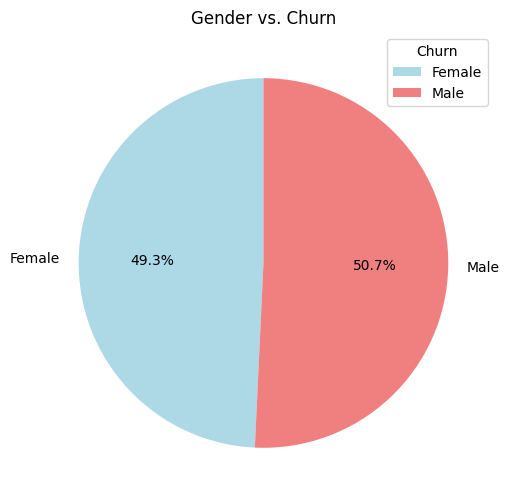

In [53]:

# Pie chart

gender_churn = combined_data.groupby('gender').size()#.unstack()
gender_churn.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Gender vs. Churn')
plt.ylabel('')
plt.legend(title='Churn')
plt.show()


2. Which services (e.g.PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) are associated with higher churn rates?

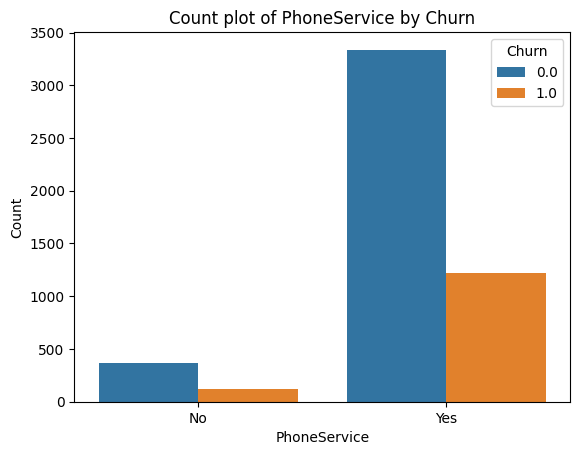

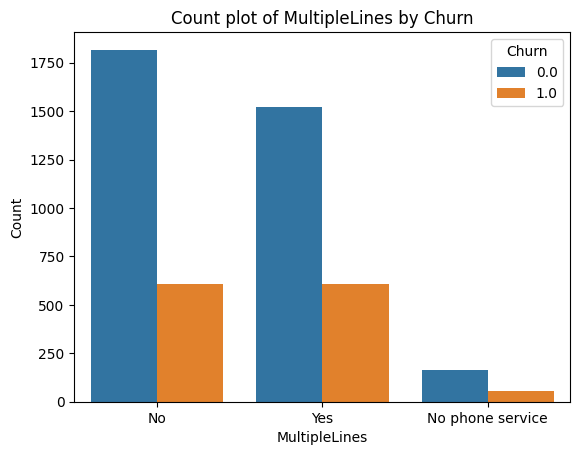

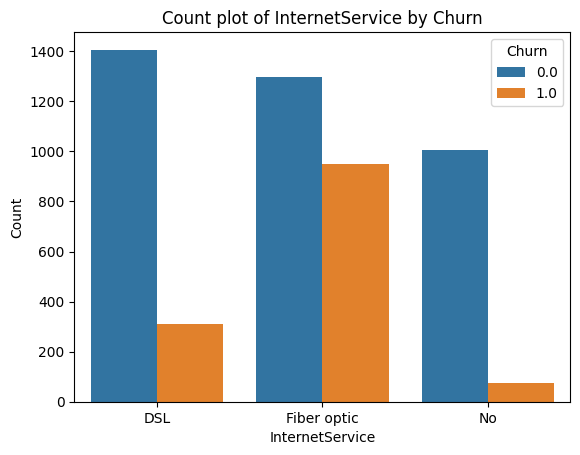

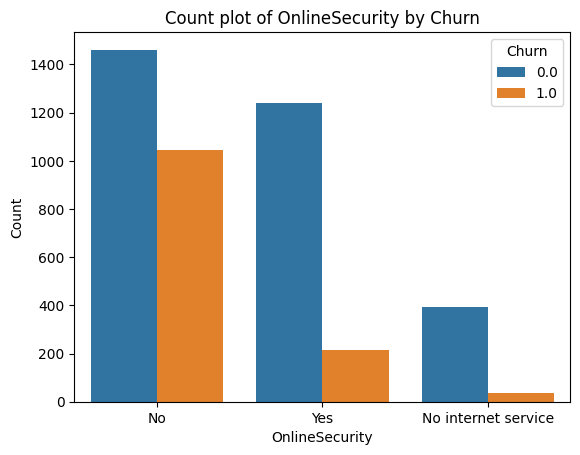

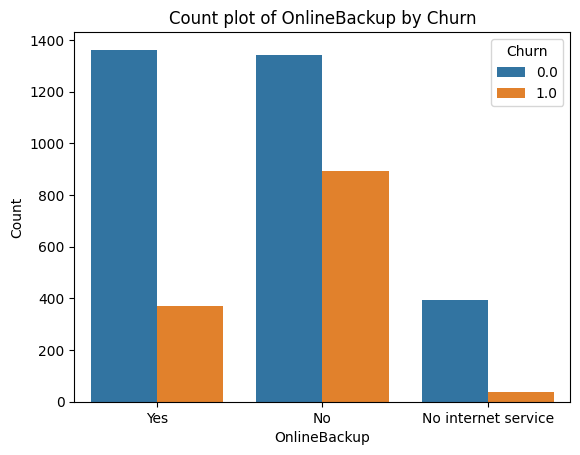

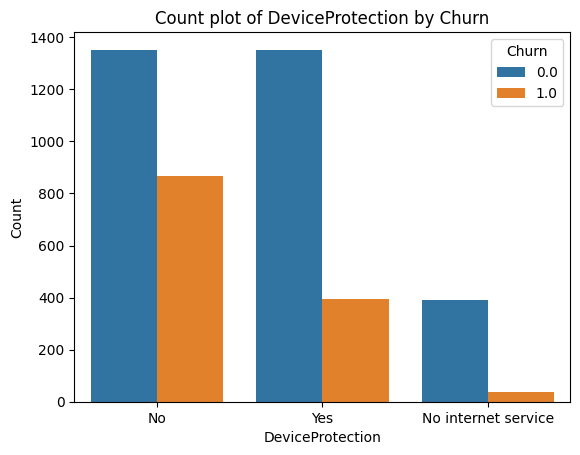

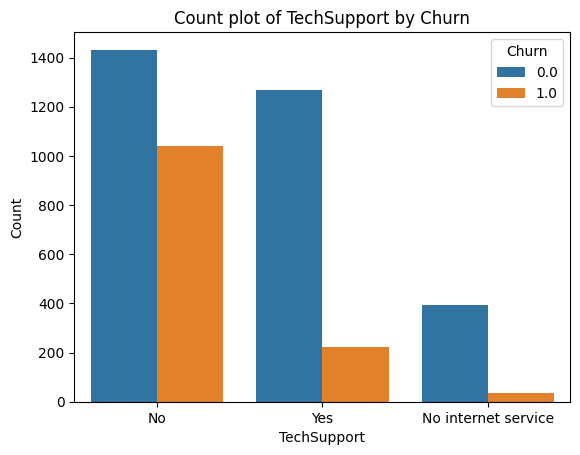

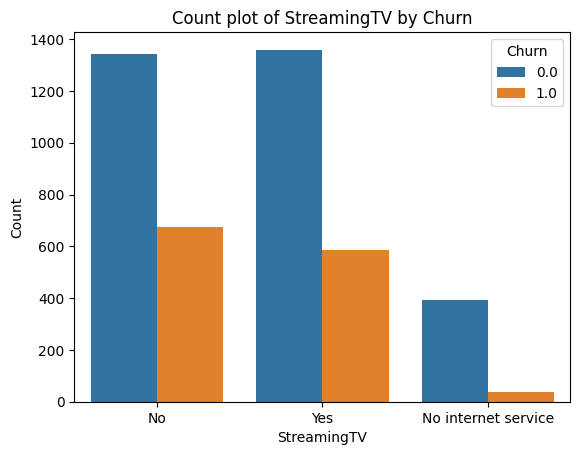

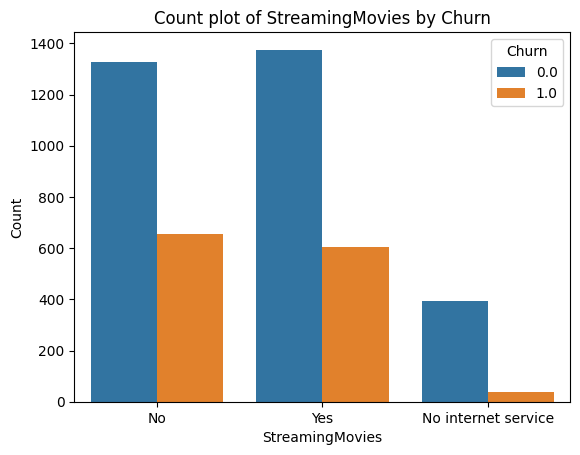

In [54]:
# Services vs Churn
'''
internet_churn = combined_data.groupby('InternetService')['Churn'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='InternetService',y='Churn', data=internet_churn)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.show()
'''
services = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Count plots for categorical features grouped by Churn
for col in services:
    sns.countplot(data=combined_data, x=col, hue='Churn')
    plt.title(f'Count plot of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


3. Can payment methods affect customer retention?

In [60]:
combined_data["PaymentMethod"].unique()

# Delete "automatic" from PaymentMethod

#combined_data["PaymentMethod"] = combined_data["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

# In the payment method, there is the word automatic and we will delete it because if we visualize a tick label is so long

0       0
1       1
2       1
3       2
4       0
       ..
5038    1
5039    3
5040    0
5041    1
5042    2
Name: PaymentMethod, Length: 5043, dtype: int64

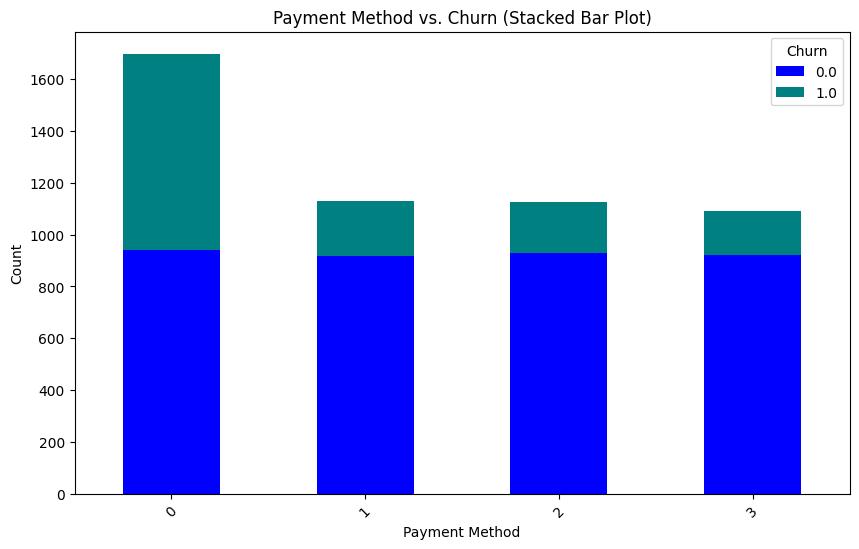

In [65]:
# Stacked bar plot

payment_churn = combined_data.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'teal'])
plt.title('Payment Method vs. Churn (Stacked Bar Plot)')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(False)
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


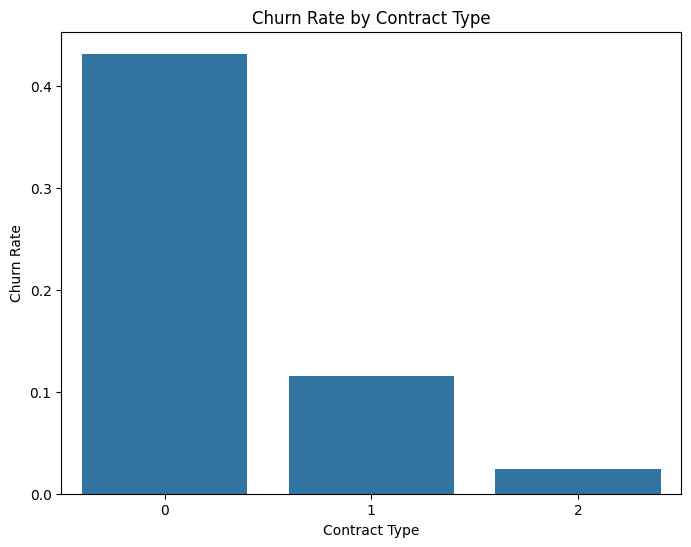

In [69]:
# Contract Type vs Churn

contract_churn = combined_data.groupby('Contract')['Churn'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Contract',y='Churn', data=contract_churn)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


4. Is there a correlation between tenure and churn rate?

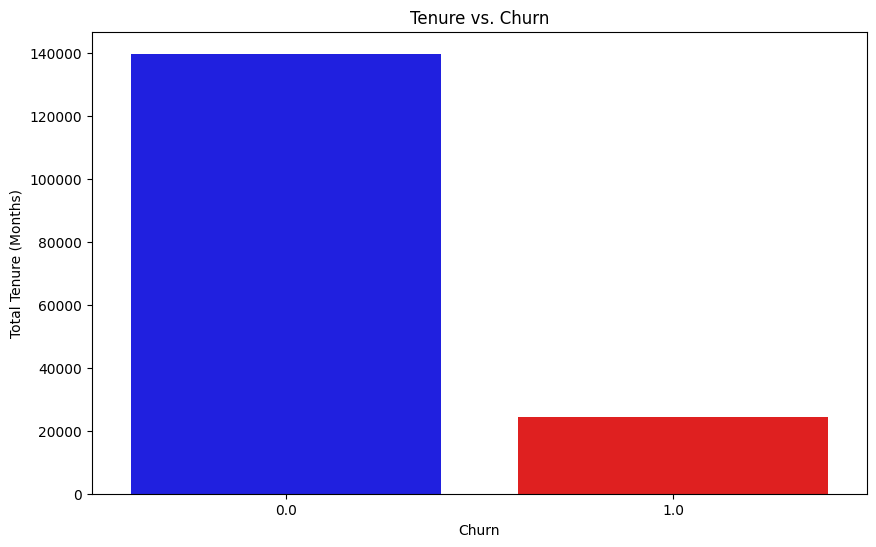

In [70]:
# Tenure vs Churn
# Bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='tenure', data=combined_data, ci=None, estimator=sum, palette=['blue', 'red'])
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Tenure (Months)')
plt.grid(False)
plt.show()
# Correlation coefficient
correlation = combined_data['tenure'].corr(combined_data['Churn'])

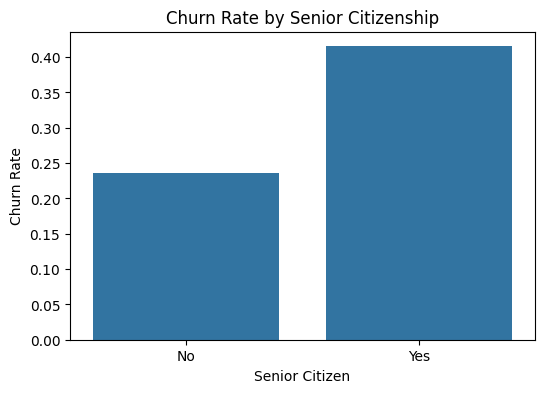

In [71]:
# How do customer demographics (like senior citizenship) affect churn rates

# Create a new feature for Senior Citizenship
combined_data['SeniorCitizen'] = combined_data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Groupby and Aggregation
senior_churn = combined_data.groupby('SeniorCitizen')['Churn'].mean().reset_index()

# Visualization: Churn Rate by Senior Citizenship
plt.figure(figsize=(6, 4))
sns.barplot(x='SeniorCitizen', y='Churn', data=senior_churn)
plt.title('Churn Rate by Senior Citizenship')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')
plt.show()


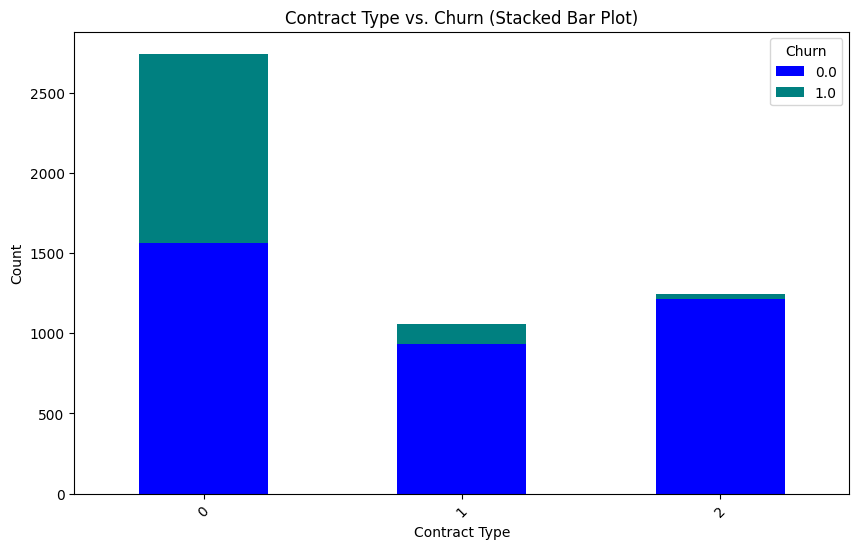

In [72]:
# How does contract type and monthly charges influence churn

# Stacked bar plot

payment_churn = combined_data.groupby(['Contract', 'Churn']).size().unstack()
payment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'teal'])
plt.title('Contract Type vs. Churn (Stacked Bar Plot)')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.grid(False)
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

Test Hypothesis

For hypothesis testing, we'll look at a couple of attributes to determine if we should reject our hypothesis or fail to reject it.

In [32]:
# Checking data types
print(combined_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService     float64
OnlineSecurity      float64
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [79]:
'''
# Check unique values in 'Churn'
print(combined_data['Churn'].unique())  # Check unique values to confirm

# Convert 'Churn' to binary numeric values
combined_data['Churn'] = combined_data['Churn'].map({'Yes': 1, 'No': 0})

# Verify conversion
print(combined_data['Churn'].unique())  # Check unique values after conversion
'''

"\n# Check unique values in 'Churn'\nprint(combined_data['Churn'].unique())  # Check unique values to confirm\n\n# Convert 'Churn' to binary numeric values\ncombined_data['Churn'] = combined_data['Churn'].map({'Yes': 1, 'No': 0})\n\n# Verify conversion\nprint(combined_data['Churn'].unique())  # Check unique values after conversion\n"

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# We will sample a couple of attributes to test our hypothesis

# combined_data['Churn'] = combined_data['Churn'].astype(int)

# ANOVA for Contract
model_contract = ols('Churn ~ C(Contract)', data=combined_data).fit()
anova_contract = anova_lm(model_contract)
print(anova_contract)

# ANOVA for Gender
model_gender = ols('Churn ~ C(gender)', data=combined_data).fit()
anova_gender = anova_lm(model_gender)
print(anova_gender)

# ANOVA for Tenure
combined_data['tenure_bins'] = pd.cut(combined_data['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1yr', '1-2yrs', '2-4yrs', '4-5yrs', '5-6yrs'])

model_tenure = ols('Churn ~ C(tenure_bins)', data=combined_data).fit()
anova_tenure = anova_lm(model_tenure)
print(anova_tenure)

# ANOVA for Total Charges
model_total_charges = ols('Churn ~ C(TotalCharges)', data=combined_data).fit()
anova_results_total_charges = sm.stats.anova_lm(model_total_charges, typ=2)

print(anova_results_total_charges)

# ANOVA for Payment Methods
model_payment_method = ols('Churn ~ C(PaymentMethod)', data=combined_data).fit()
anova_results_payment_method = sm.stats.anova_lm(model_payment_method, typ=2)

print(anova_results_payment_method)


Here's my result: df      sum_sq    mean_sq           F         PR(>F)
C(Contract)     2.0  171.707025  85.853512  533.904189  4.983109e-211
Residual     5039.0  810.287422   0.160803         NaN            NaN
               df      sum_sq   mean_sq         F    PR(>F)
C(gender)     1.0    0.006239  0.006239  0.032022  0.857987
Residual   5040.0  981.988208  0.194839       NaN       NaN
                    df      sum_sq    mean_sq           F         PR(>F)
C(tenure_bins)     4.0  122.669331  30.667333  179.590993  4.900390e-144
Residual        5029.0  858.762533   0.170762         NaN            NaN
                     sum_sq      df         F    PR(>F)
C(TotalCharges)  948.604533  4869.0  0.984874  0.568338
Residual          33.233333   168.0       NaN       NaN
                      sum_sq      df           F        PR(>F)
C(PaymentMethod)   84.757748     3.0  158.638753  2.966421e-98
Residual          897.236699  5038.0         NaN           NaN

Contract Interpretation:
The low p-value suggests a strong relationship between the type of contract and churn. Customers on different contract terms (month-to-month, one year, two years) have significantly different churn rates. Month-to-month contracts, for example, might be more likely to churn compared to longer-term contracts.

Gender Interpretation:
The high p-value indicates that gender does not significantly affect churn rates. In other words, male and female customers churn at similar rates, and gender is not a significant predictor of whether a customer will churn.

Tenure Interpretation:
The very low p-value suggests a strong relationship between tenure and churn. Customers with different tenures have significantly different churn rates. Typically, customers with shorter tenures are more likely to churn compared to those who have been with the company for a longer period.

Total Charges Interpretation:
The p-value is greater than 0.05, suggesting that there is no significant relationship between total charges and churn.Therefore, total charges do not significantly influence churn rates.

Payment Method Interpretation:
The p-value is very small, indicating a highly significant relationship between payment method and churn. Different payment methods have significantly different churn rates.



Data Preparation

    a. Separating The Data

In [3]:
combined_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
combined_data['Churn'].value_counts()

Churn
False    2219
No       1487
True      780
Yes       556
Name: count, dtype: int64

This is an unbalanced data

In [7]:
unchurned = combined_data[combined_data.Churn == 'No']
churn = combined_data[combined_data.Churn == 'Yes']

In [8]:
print(unchurned.shape)
print(churn.shape)

(3706, 21)
(1336, 21)


In [9]:
# Statistical Measures Of The Data

churn.TotalCharges.describe()

count      1336
unique     1293
top       69.65
freq          4
Name: TotalCharges, dtype: object

In [10]:
unchurned.TotalCharges.describe()

count                   3701
unique                  3633
top       20.450000762939453
freq                       5
Name: TotalCharges, dtype: object

    Undersampling

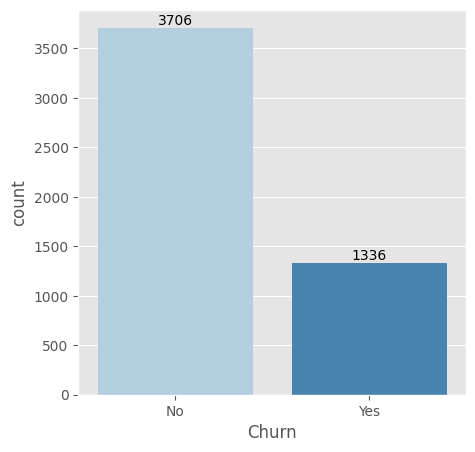

In [11]:
#Apply the ggplot style

plt.style.use("ggplot")

plt.figure(figsize=(5,5))
ax = sns.countplot(x = combined_data["Churn"],palette="Blues")
for container in ax.containers:
    ax.bar_label(container)
plt.show()


Since the churned count is roughly more than twice of the unchurned, we have to do sampling, in this case, undersampling.

Build a sample dataset containing similar distributions of Churn and Unchurned.

If we continue with the data as is, and train our model using this, our model will be biased, thereby predicting most customers as churned based on the fact that it has a higher count and ultimately a higher mean.

In [12]:
unchurned_sample = unchurned.sample(n = 1336)

In [13]:
new_dataset = pd.concat([churn, unchurned_sample], axis = 0)

In [15]:
new_dataset['Churn'].value_counts()

Churn
Yes    1336
No     1336
Name: count, dtype: int64

    Separate features (X) and target variable (y)

In [16]:
X = new_dataset.drop(columns = 'Churn', axis = 1)
y = new_dataset['Churn']

In [17]:
print(X)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
8     7892-POOKP  Female              0     Yes         No      28   
13    0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
4206  2279-AXJJK    Male              0     Yes         No      52   
342   7520-HQWJU  Female              0     Yes        Yes      66   
3221  5336-UFNZP  Female              1     Yes        Yes      65   
343   9639-BUJXT    Male              0      No         No      63   
853   7905-TVXTA  Female              0      No         No       5   

     PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
2             Yes            No             DSL            Yes          Yes   
4

In [18]:
print(y)

2       Yes
4       Yes
5       Yes
8       Yes
13      Yes
       ... 
4206     No
342      No
3221     No
343      No
853      No
Name: Churn, Length: 2672, dtype: object


    Split Dataset into Training and Evaluation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 2)

    Feature Engineering

        Handling Missing Values

In [20]:
combined_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [21]:
# 1. Handling missing values for service-related features -01

# Check if customer has no internet service and fill related columns with 'No'

service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Fill 'No' where InternetService is 'No'

for col in service_columns:
    combined_data.loc[combined_data['InternetService'] == 'No', col] = 'No'

# If PhoneService is 'No', MultipleLines should be 'No'

combined_data.loc[combined_data['PhoneService'] == 'No', 'MultipleLines'] = 'No'


In [22]:
# 2. Handling missing TotalCharges

# Fill missing TotalCharges with 0 where tenure is 0

combined_data['TotalCharges'] = pd.to_numeric(combined_data['TotalCharges'], errors='coerce')

combined_data.loc[combined_data['tenure'] == 0, 'TotalCharges'] = 0

# Fill any remaining missing TotalCharges with median value

combined_data['TotalCharges'].fillna(combined_data['TotalCharges'].median(), inplace=True)


In [23]:
# 3. Handling missing Churn

# Fill missing Churn with the most frequent value

combined_data['Churn'].fillna(combined_data['Churn'].mode()[0], inplace=True)


In [ ]:
# 4. Handling Payment Method Column

In [25]:
combined_data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
# Delete "automatic" from PaymentMethod

combined_data["PaymentMethod"] = combined_data["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

In [27]:
combined_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
columns = combined_data.columns

# Unique values in each column
for column in columns:
    print(f'{column}')
    print(f'There are {combined_data[column].unique().size} unique values')
    print(f'These are {combined_data[column].unique()}')
    print('=' * 50)

customerID
There are 5043 unique values
These are ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
These are ['Female' 'Male']
SeniorCitizen
There are 2 unique values
These are [0 1]
Partner
There are 2 unique values
These are ['Yes' 'No']
Dependents
There are 2 unique values
These are ['No' 'Yes']
tenure
There are 73 unique values
These are [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
These are ['No' 'Yes']
MultipleLines
There are 2 unique values
These are ['No' 'Yes']
InternetService
There are 3 unique values
These are ['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 2 unique values
These are ['No' 'Yes']
OnlineBackup
There are 2 unique values
These are ['Yes' 'No']
DeviceProtection
There are 2 uniq

In [33]:
# Display all rows with any NaN values
print(combined_data[combined_data.isnull().any(axis=1)])


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


Service Features
 For each column related to services, check if InternetService is 'No' and fill in the respective service columns with 'No'. Similarly, if PhoneService is 'No', we set MultipleLines to 'No'.

TotalCharges
 Convert TotalCharges to numeric to handle any non-numeric values. For customers with tenure equal to 0, we assume they have not been charged yet and set TotalCharges to 0. Fill any remaining missing values with the median of TotalCharges.

Churn
 We fill the missing Churn value with the mode (most frequent value). This is usually either 'Yes' or 'No'.

Checking For Outliers

In [34]:
# Detection through statistics using IQR method

# Statistical summary to identify outliers in TotalCharges
Q1 = combined_data['TotalCharges'].quantile(0.25)
Q3 = combined_data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
total_charges_outliers = combined_data[(combined_data['TotalCharges'] < Q1 - 1.5 * IQR) | (combined_data['TotalCharges'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", len(total_charges_outliers))

Number of outliers: 0


In [35]:
# Statistical summary to identify outliers in MonthlyCharges
Q1 = combined_data['MonthlyCharges'].quantile(0.25)
Q3 = combined_data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
monthly_charges_outliers = combined_data[(combined_data['MonthlyCharges'] < Q1 - 1.5 * IQR) | (combined_data['MonthlyCharges'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", len(monthly_charges_outliers))


Number of outliers: 0


In [36]:

# Statistical summary to identify outliers in Tenure
Q1 = combined_data['tenure'].quantile(0.25)
Q3 = combined_data['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
tenure_outliers = combined_data[(combined_data['tenure'] < Q1 - 1.5 * IQR) | (combined_data['tenure'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", len(tenure_outliers))


Number of outliers: 0


In [37]:
# Statistical summary to identify outliers in SeniorCitizen
Q1 = combined_data['SeniorCitizen'].quantile(0.25)
Q3 = combined_data['SeniorCitizen'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
tenure_outliers = combined_data[(combined_data['SeniorCitizen'] < Q1 - 1.5 * IQR) | (combined_data['SeniorCitizen'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", len(tenure_outliers))


Number of outliers: 819


        Separate input features into numeric and categorical features

In [46]:
# Identify numerical and categorical columns

numeric_features = combined_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = combined_data.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from the list of features

if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

print("Numerical Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


        Handling missing values using simple imputer

In [54]:
# Create imputers

numeric_imputer = SimpleImputer(strategy='median')  
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for numerical features
combined_data[numeric_features] = numeric_imputer.fit_transform(combined_data[numeric_features])

# Impute missing values for categorical features
combined_data[categorical_features] = categorical_imputer.fit_transform(combined_data[categorical_features])

print("DataFrame after Imputation:\n", combined_data)

DataFrame after Imputation:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            0.0     Yes         No     1.0   
1     5575-GNVDE    Male            0.0      No         No    34.0   
2     3668-QPYBK    Male            0.0      No         No     2.0   
3     7795-CFOCW    Male            0.0      No         No    45.0   
4     9237-HQITU  Female            0.0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
5038  6840-RESVB    Male            0.0     Yes        Yes    24.0   
5039  2234-XADUH  Female            0.0     Yes        Yes    72.0   
5040  4801-JZAZL  Female            0.0     Yes        Yes    11.0   
5041  8361-LTMKD    Male            1.0     Yes         No     4.0   
5042  3186-AJIEK    Male            0.0      No         No    66.0   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL            

        Scale or normalize numeric features

In [48]:
from sklearn.preprocessing import StandardScaler

# Create the scaler for numerical features

scaler = StandardScaler()

# Fit and transform numerical features

X_numeric = combined_data[numeric_features]
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Convert the scaled data back to a DataFrame for easier handling

X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

X_numeric_scaled_df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440332,-1.287404,-1.172128,-0.999671
1,-0.440332,0.058031,-0.270752,-0.180192
2,-0.440332,-1.246633,-0.373862,-0.965167
3,-0.440332,0.506510,-0.758028,-0.201674
4,-0.440332,-1.246633,0.186588,-0.945998


        Encode categorical features

In [49]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder for categorical features

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical features

X_categorical = combined_data[categorical_features]
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Convert the encoded data back to a DataFrame
# Column names are generated by combining feature name and category
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoded_feature_names)

X_categorical_encoded_df.head()


,customerID_0002-ORFBO,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0017-DINOC,customerID_0019-EFAEP,customerID_0020-INWCK,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


        Perform transformations for skewed data

In [50]:
# Log transformation for skewed data

# Adding 1 to avoid log(0) which is undefined

X_numeric_scaled_df['TotalCharges_log'] = np.log1p(X_numeric_scaled_df['TotalCharges'])

# You can drop the original column if you don't need it
# X_numeric_scaled_df = X_numeric_scaled_df.drop(columns=['TotalCharges'])

print(X_numeric_scaled_df[['TotalCharges', 'TotalCharges_log']].head())


   TotalCharges  TotalCharges_log
0     -0.999671         -8.019315
1     -0.180192         -0.198685
2     -0.965167         -3.357191
3     -0.201674         -0.225239
4     -0.945998         -2.918738


        Combining everything into a pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create a pipeline for numeric features

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler()),
    ('log_transform', FunctionTransformer(np.log1p, validate=False, check_inverse=False))  # Example of log transform
])

# Create a pipeline for categorical features

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)
])

# Combine the two pipelines

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fit and transform the data

X_processed = preprocessor.fit_transform(combined_data)

# Convert processed data to DataFrame for inspection

processed_feature_names = numeric_features + list(encoder.get_feature_names_out(categorical_features))
X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)

print(X_processed_df.head())


   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0      -0.580411       NaN             NaN     -8.019315   
1      -0.580411  0.056410       -0.315742     -0.198685   
2      -0.580411       NaN       -0.468184     -3.357191   
3      -0.580411  0.409796       -1.418932     -0.225239   
4      -0.580411       NaN        0.171082     -2.918738   

   customerID_0002-ORFBO  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                    0.0                    0.0                    0.0  ...   
1                    0.0            